## Forecast the CocaCola prices.

##### Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import log
from pandas import Grouper
from pandas import DataFrame
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import warnings
warnings.simplefilter("ignore")


In [4]:
coca=pd.read_excel("CocaCola_Sales_Rawdata (1).xlsx")
coca.shape

(42, 2)

In [5]:
coca.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [6]:
coca.info()
#all the rows are non null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [8]:
coca['Quarter_Year'] = coca['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
#Clean way to convert quarterly periods to datetime in pandas
coca.head()

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987


In [9]:
# converting into datetime formate as the index was not in correct formate.
coca['date'] = ( pd.to_datetime(coca['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1])),dayfirst=True))

In [10]:
coca

,Quarter,Sales,Quarter_Year,date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


In [11]:
coca1=coca.drop(columns=["Quarter","Quarter_Year"])

In [12]:
coca1 = coca1[['date','Sales']]
coca1

,date,Sales
0,1986-01-01,1734.827000
1,1986-04-01,2244.960999
2,1986-07-01,2533.804993
3,1986-10-01,2154.962997
4,1987-01-01,1547.818996
5,1987-04-01,2104.411995
6,1987-07-01,2014.362999
7,1987-10-01,1991.746998
8,1988-01-01,1869.049999
9,1988-04-01,2313.631996


In [13]:
Coca=coca1.set_index("date")#,inplace=True)

In [14]:
Coca=Coca.copy() # copy is made to keep the original data undisturbed


In [15]:
Coca.head()

,Sales
date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


### visualization

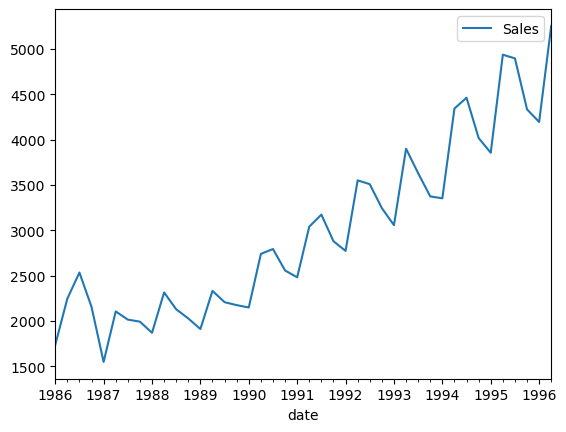

In [16]:
Coca.plot()
plt.show()
#from this line plot it is seen that the plot in showing +ve ternd and also the seasonality not clearly seen here

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

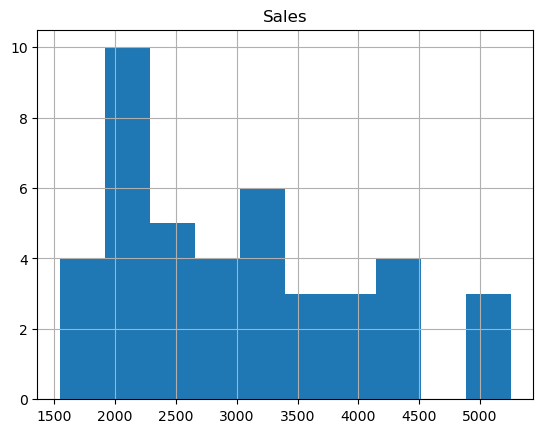

In [17]:
#histogram 
Coca.hist()

<AxesSubplot:ylabel='Density'>

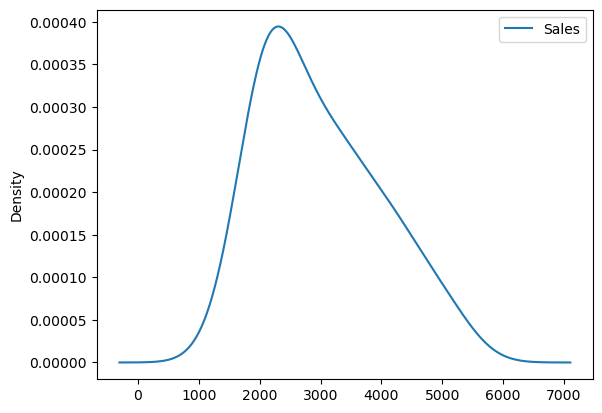

In [18]:
#densityplot
Coca.plot(kind='kde')

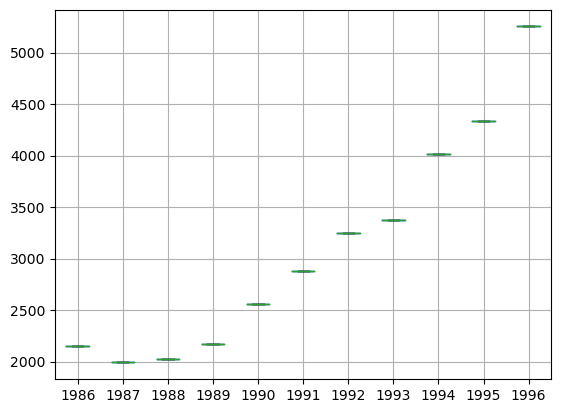

In [19]:
#boxplot and whiskers
groups = Coca.groupby(Grouper(freq='q')) # "A" stands for annual
years = DataFrame()
for name, group in groups:
    years[name.year] = list(group.values.flatten())
years.boxplot()
plt.show()


In [20]:
group.values.flatten().shape

(1,)

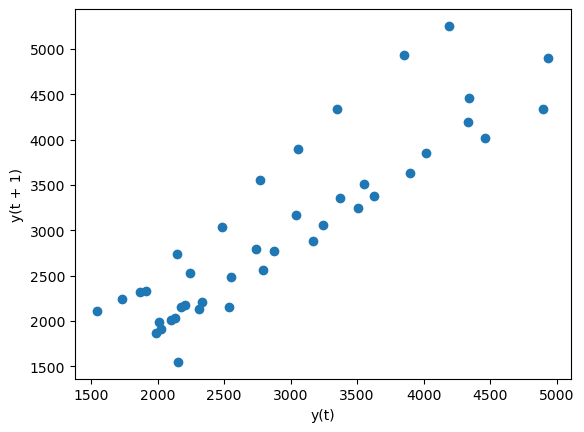

In [22]:
# lag plot
lag_plot(Coca,lag=1)
plt.show()
#from the lag plot we can sense that there is +ve correlation from the todays data to the tommorows data

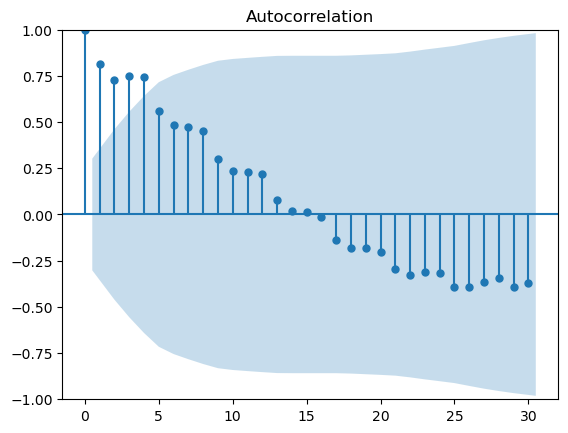

In [23]:
#autocorrelation Acf is used to find the statistically significant values and the best lag for the lag plot
plot_acf(Coca,lags=30)
plt.show()

#from this plot we can get that statistically significant lag values are within-5

since we are having the quaterly data and we do upsampling and we can get data for all the months
and this upsampling is to done by the interpolation


In [24]:
upsampled = Coca.resample('M').mean()
print(upsampled.head(32))
#the missing values are to be filled by the interploated values

                  Sales
date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN
1986-06-30          NaN
1986-07-31  2533.804993
1986-08-31          NaN
1986-09-30          NaN
1986-10-31  2154.962997
1986-11-30          NaN
1986-12-31          NaN
1987-01-31  1547.818996
1987-02-28          NaN
1987-03-31          NaN
1987-04-30  2104.411995
1987-05-31          NaN
1987-06-30          NaN
1987-07-31  2014.362999
1987-08-31          NaN
1987-09-30          NaN
1987-10-31  1991.746998
1987-11-30          NaN
1987-12-31          NaN
1988-01-31  1869.049999
1988-02-29          NaN
1988-03-31          NaN
1988-04-30  2313.631996
1988-05-31          NaN
1988-06-30          NaN
1988-07-31  2128.320000
1988-08-31          NaN


In [25]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head())

                  Sales
date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330


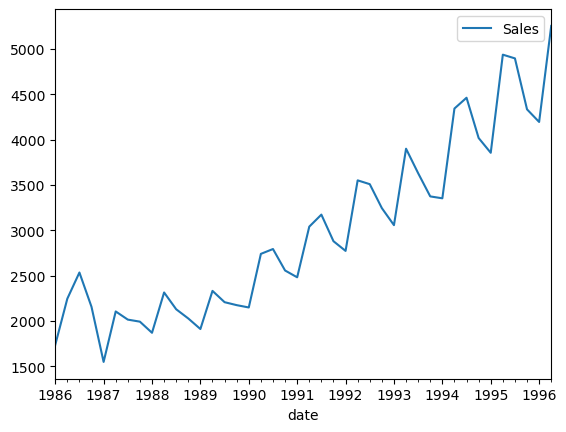

In [26]:
interpolated.plot()
plt.show()

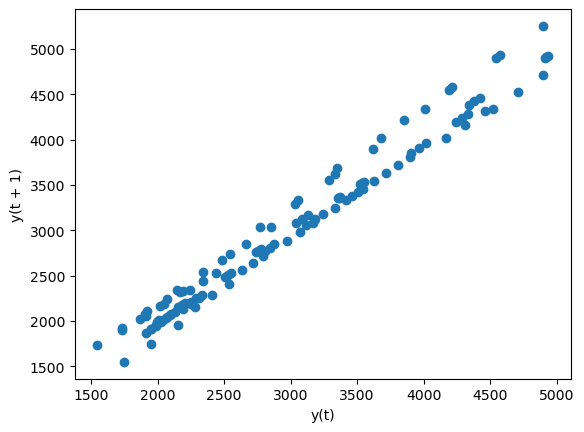

In [27]:
lag_plot(interpolated,lag=1)
plt.show()

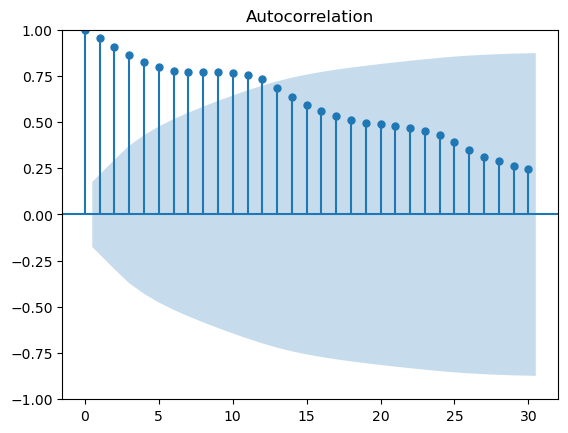

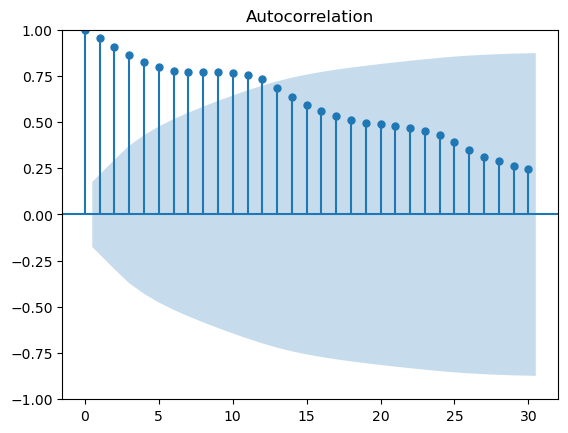

In [28]:
plot_acf(interpolated,lags=30)


In [29]:
samp= interpolated.copy()

In [30]:
samp

,Sales
date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


### Transformations

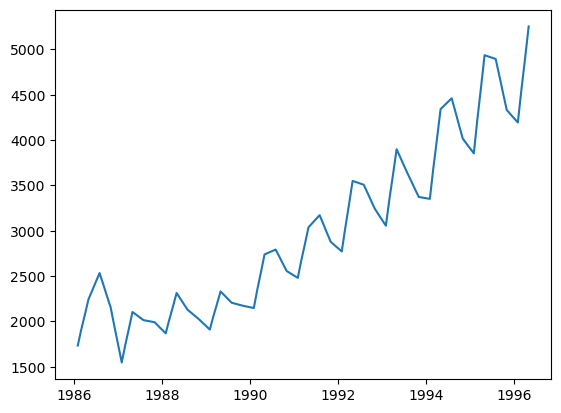

In [32]:
plt.plot(samp)
plt.show()

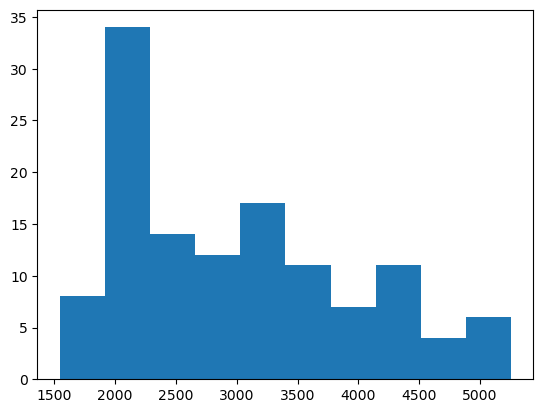

In [34]:
plt.hist(samp)
plt.show()

### Square root transform

In [35]:
df = DataFrame(samp.values)
df.columns = ['Sales']
df['Sales'] = (df['Sales'])**0.5

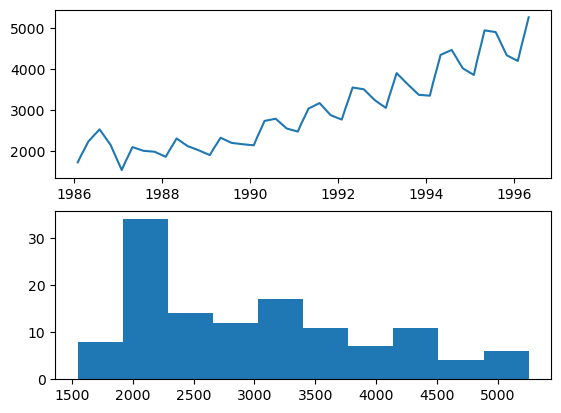

In [36]:
#lineplot,
plt.subplot(211)
plt.plot(samp['Sales'])
# histogram
plt.subplot(212)
plt.hist(samp['Sales'])
plt.show()

### Log Transform

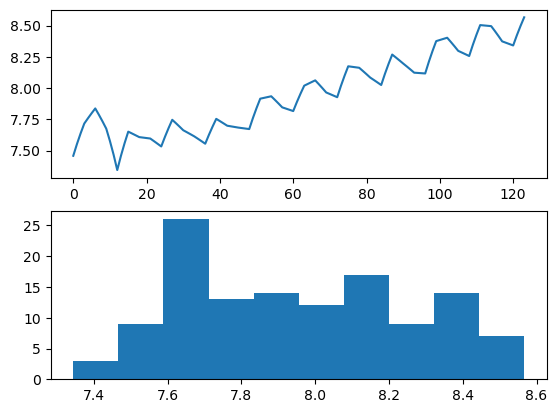

In [37]:
df = DataFrame(samp.values)
df.columns = ['Sales']
df['Sales'] = log(df['Sales'])

# line plot
plt.subplot(211)
plt.plot(df['Sales'])
# histogram
plt.subplot(212)
plt.hist(df['Sales'])
plt.show()

splitting of the test and the train models 
in time series the splitting of the data should not be carried over in a random manner the should also be in series

In [38]:
Train = interpolated.head(-12)
Test = interpolated.tail(12)

In [39]:
Train

,Sales
date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1994-12-31,3908.333333
1995-01-31,3854.000000
1995-02-28,4214.666667


## time series decomposition plot

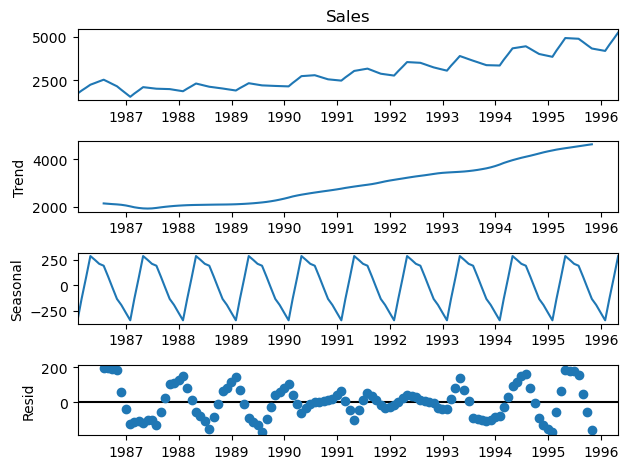

In [40]:
decompose_ts_add = seasonal_decompose(interpolated.Sales)  
decompose_ts_add.plot()
plt.show()

## Evaluation Metric MAPE

In [41]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Simple exponential method

In [42]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

7.528920151221705

##  Holt model

In [43]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

7.9715438298078

## Holts winter exponential smoothing with additive seasonality

In [44]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

4.963328784192284

##  Holts winter exponential smoothing with multiplicative seasonality

In [45]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

4.78490230286808

In [46]:
rmse_hwe_mul_add = (mean_squared_error(pred_hwe_mul_add,Test.Sales))**0.5
rmse_hwe_mul_add

249.10229299271208

## Final model for the full data set (train+test)

In [47]:
hwe_model_add_add = ExponentialSmoothing(interpolated["Sales"],seasonal="add",trend="add",seasonal_periods=10).fit()


In [48]:
#Forecasting for next 12 time periods
hwe_model_add_add.forecast(12)

1996-05-31    5634.022667
1996-06-30    6028.465140
1996-07-31    6403.865614
1996-08-31    6767.772230
1996-09-30    7059.368652
1996-10-31    7370.796050
1996-11-30    7617.021925
1996-12-31    7954.348607
1997-01-31    8248.783688
1997-02-28    8612.157059
1997-03-31    8989.178644
1997-04-30    9383.621118
Freq: M, dtype: float64

In [49]:
interpolated

,Sales
date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


In [50]:
interpolated.reset_index(inplace=True)

In [51]:
interpolated["t"]=1

In [52]:
interpolated.head()

,date,Sales,t
0,1986-01-31,1734.827000,1
1,1986-02-28,1904.871666,1
2,1986-03-31,2074.916332,1
3,1986-04-30,2244.960999,1
4,1986-05-31,2341.242330,1


In [53]:
for i,row in interpolated.iterrows():
    interpolated['t'].iloc[i] = i+1

In [54]:
interpolated

,date,Sales,t
0,1986-01-31,1734.827000,1
1,1986-02-28,1904.871666,2
2,1986-03-31,2074.916332,3
3,1986-04-30,2244.960999,4
4,1986-05-31,2341.242330,5
...,...,...,...
119,1995-12-31,4240.333333,120
120,1996-01-31,4194.000000,121
121,1996-02-29,4547.000000,122
122,1996-03-31,4900.000000,123


In [55]:
interpolated['t_sq'] = (interpolated['t'])**2
## inserted t_sq column with values

In [56]:
interpolated

,date,Sales,t,t_sq
0,1986-01-31,1734.827000,1,1
1,1986-02-28,1904.871666,2,4
2,1986-03-31,2074.916332,3,9
3,1986-04-30,2244.960999,4,16
4,1986-05-31,2341.242330,5,25
...,...,...,...,...
119,1995-12-31,4240.333333,120,14400
120,1996-01-31,4194.000000,121,14641
121,1996-02-29,4547.000000,122,14884
122,1996-03-31,4900.000000,123,15129


In [57]:
interpolated["month"] = interpolated.date.dt.strftime("%b") # month extraction
interpolated["year"] = interpolated.date.dt.strftime("%Y") # year extraction


In [58]:
interpolated

,date,Sales,t,t_sq,month,year
0,1986-01-31,1734.827000,1,1,Jan,1986
1,1986-02-28,1904.871666,2,4,Feb,1986
2,1986-03-31,2074.916332,3,9,Mar,1986
3,1986-04-30,2244.960999,4,16,Apr,1986
4,1986-05-31,2341.242330,5,25,May,1986
...,...,...,...,...,...,...
119,1995-12-31,4240.333333,120,14400,Dec,1995
120,1996-01-31,4194.000000,121,14641,Jan,1996
121,1996-02-29,4547.000000,122,14884,Feb,1996
122,1996-03-31,4900.000000,123,15129,Mar,1996


In [59]:
months=pd.get_dummies(interpolated["month"])
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119,0,0,1,0,0,0,0,0,0,0,0,0
120,0,0,0,0,1,0,0,0,0,0,0,0
121,0,0,0,1,0,0,0,0,0,0,0,0
122,0,0,0,0,0,0,0,1,0,0,0,0


In [60]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
## storing the months as serial wise again in months variable


In [62]:
cola=pd.concat([interpolated,months],axis=1)

In [63]:
cola.head()

,date,Sales,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1986-01-31,1734.827000,1,1,Jan,1986,1,0,0,0,0,0,0,0,0,0,0,0
1,1986-02-28,1904.871666,2,4,Feb,1986,0,1,0,0,0,0,0,0,0,0,0,0
2,1986-03-31,2074.916332,3,9,Mar,1986,0,0,1,0,0,0,0,0,0,0,0,0
3,1986-04-30,2244.960999,4,16,Apr,1986,0,0,0,1,0,0,0,0,0,0,0,0
4,1986-05-31,2341.242330,5,25,May,1986,0,0,0,0,1,0,0,0,0,0,0,0


In [64]:
cola['log_sales'] = np.log(cola['Sales'])

In [65]:
cola

,date,Sales,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_sales
0,1986-01-31,1734.827000,1,1,Jan,1986,1,0,0,0,0,0,0,0,0,0,0,0,7.458663
1,1986-02-28,1904.871666,2,4,Feb,1986,0,1,0,0,0,0,0,0,0,0,0,0,7.552170
2,1986-03-31,2074.916332,3,9,Mar,1986,0,0,1,0,0,0,0,0,0,0,0,0,7.637676
3,1986-04-30,2244.960999,4,16,Apr,1986,0,0,0,1,0,0,0,0,0,0,0,0,7.716443
4,1986-05-31,2341.242330,5,25,May,1986,0,0,0,0,1,0,0,0,0,0,0,0,7.758437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1995-12-31,4240.333333,120,14400,Dec,1995,0,0,0,0,0,0,0,0,0,0,0,1,8.352397
120,1996-01-31,4194.000000,121,14641,Jan,1996,1,0,0,0,0,0,0,0,0,0,0,0,8.341410
121,1996-02-29,4547.000000,122,14884,Feb,1996,0,1,0,0,0,0,0,0,0,0,0,0,8.422223
122,1996-03-31,4900.000000,123,15129,Mar,1996,0,0,1,0,0,0,0,0,0,0,0,0,8.496990


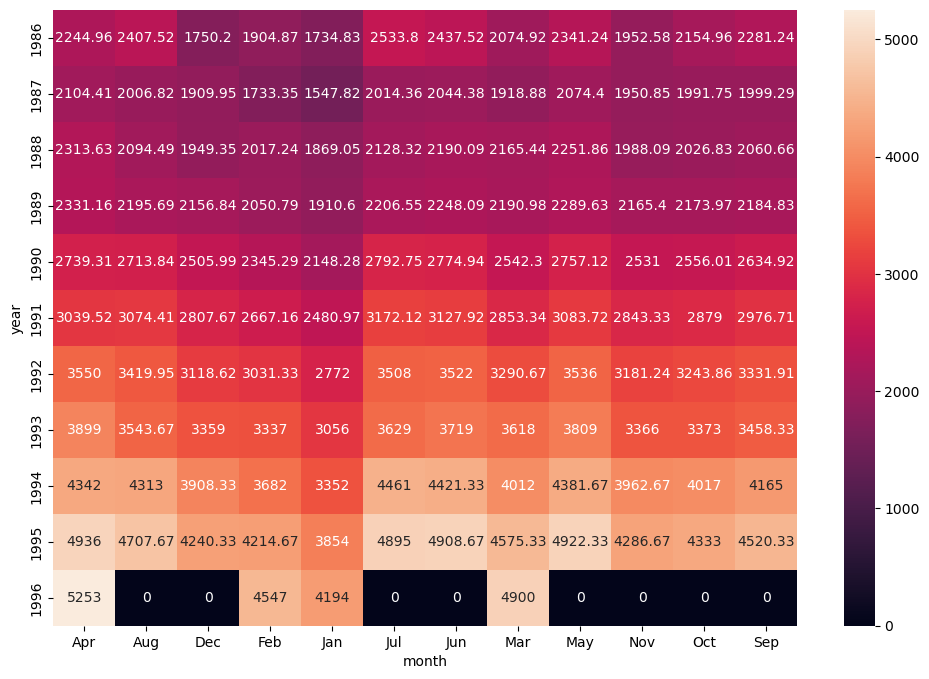

In [67]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=cola,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
plt.show()

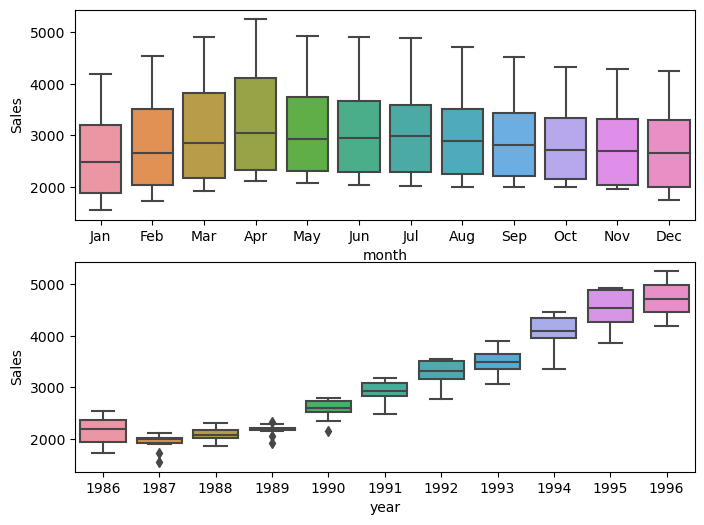

In [69]:
# Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data= cola)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=cola)
plt.show()

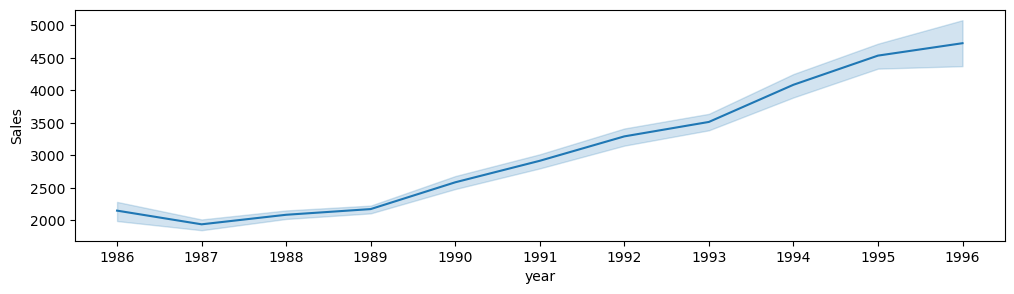

In [71]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=cola)
plt.show()

## splitting the data

In [72]:
Train=cola.head(-12)
Test=cola.tail(12)

In [79]:
#Linear Model
import statsmodels.formula.api as smf 

Linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(Linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

561.9428078334428

In [80]:
#Exponential
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

432.8783117870584

In [81]:
#Quadratic 

Quad = smf.ols('Sales~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

416.1240473625366

In [82]:
#Additive seasonality 

Add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(Add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1840.3042900245862

In [83]:
#Additive Seasonality Quadratic 

Add_sea_Quad = smf.ols('Sales~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(Add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

271.90623331298764

In [84]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1939.0823781993154

In [85]:
#Multiplicative Additive Seasonality 

Multi_Add_sea = smf.ols('log_sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Multi_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

236.26364020374857

In [86]:
#comparing the results 

Data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(Data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,236.263640
4,rmse_add_sea_quad,271.906233
2,rmse_Quad,416.124047
1,rmse_Exp,432.878312
0,rmse_linear,561.942808
3,rmse_add_sea,1840.304290
5,rmse_Mult_sea,1939.082378


the final model we can use for assign forecating is Multiplicative Additive Seasonality 